# MLE Regression

https://towardsdatascience.com/a-gentle-introduction-to-maximum-likelihood-estimation-9fbff27ea12f

## Scientific computing in Python   (https://scipy.org)

In [1]:
import numpy as np, pandas as pd
from matplotlib import pyplot as plt

import seaborn as sns
from scipy.optimize import minimize
import scipy.stats as stats

import statsmodels.api as sm

In [2]:
# generate random data
N = 100

x = np.linspace(0,10,N)
e = np.random.normal(loc = 0.0, scale = 5.0, size = N)
y = 3*x + e

df = pd.DataFrame({'y':y, 'x':x})
df['constant'] = 1

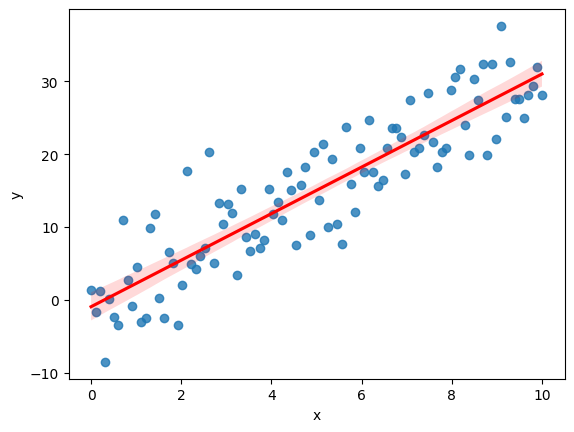

In [17]:
sns.regplot(x=df.x, y=df.y, line_kws={"color": "red"});

In [4]:
# split features and target
X = df[['constant', 'x']]# fit model and summarize
sm.OLS(y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     395.7
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           3.47e-36
Time:                        06:59:49   Log-Likelihood:                -295.31
No. Observations:                 100   AIC:                             594.6
Df Residuals:                      98   BIC:                             599.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant      -0.9309      0.930     -1.001      0.319      -2.776       0.914
x              3.1960      0.161     19.893      0.000       2.877       3.515
==============================================================================
Omnibus:                        2.612   Durbin-Watson:                   2.395
Prob(Omnibus):                  0.271   Jarque-Bera (JB):                2.625
Skew:                           0.367   Prob(JB):                        0.269
Kurtosis:                       2.698   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
df.head()

,y,x,constant
0,1.367461,0.00000,1
1,-1.691286,0.10101,1
2,1.202734,0.20202,1
3,-8.512500,0.30303,1
4,0.124136,0.40404,1


Try different values for N 

## Using scipy optimizer:minimize_scalar() & minimize()  

# Just an example of optimization problem

https://realpython.com/python-scipy-cluster-optimize/

In [6]:
from scipy.optimize import minimize_scalar


def objective_function(x):
    return np.exp( (x-1)**2 )

res = minimize_scalar(objective_function)

print(res)

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: 1.0
       x: 1.0
     nit: 6
    nfev: 9


### Back to our MLE regression

In [7]:
# define likelihood function
# Note that x, y must be global variables
# inputs are guesses about parameter values only
# Priors on parameters are Uniform fistribution (no constraints)

def MLERegression(params):
    intercept, beta, sd = params[0], params[1], params[2]
    yhat = intercept + beta*x # predictions
    
    # compute PDF of observed values normally distributed around mean (yhat)
    # with a standard deviation of sd

    negLL = -np.sum( stats.norm.logpdf(y, loc=yhat, scale=sd) )
    
# Laplace errors --> robust regression
#     negLL = -np.sum( stats.laplace.logpdf((y-yhat)))
    
    return(negLL)

In [8]:
guess = np.array([5,5,2])

See Optimization and root finding  (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)

In [9]:
results = minimize(MLERegression, guess, method = 'Nelder-Mead', options={'disp': True})

Optimization terminated successfully.
         Current function value: 295.305650
         Iterations: 102
         Function evaluations: 185


In [10]:
results

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 295.3056502108173
             x: [-9.309e-01  3.196e+00  4.637e+00]
           nit: 102
          nfev: 185
 final_simplex: (array([[-9.309e-01,  3.196e+00,  4.637e+00],
                       [-9.309e-01,  3.196e+00,  4.637e+00],
                       [-9.309e-01,  3.196e+00,  4.637e+00],
                       [-9.308e-01,  3.196e+00,  4.637e+00]]), array([ 2.953e+02,  2.953e+02,  2.953e+02,  2.953e+02]))

### Let us assume a Gaussian distribution for each parameter Prior

In [11]:
def MLERegressionWithGaussianPriors(params):
    tau = 1/2
    intercept, beta, sd = params[0], params[1], params[2]
    yhat = intercept + beta*x # predictions
    negLL = -  ( np.sum( stats.norm.logpdf(y, loc=yhat, scale=sd) ) + 
                (np.sum( stats.norm.logpdf( (intercept, beta), loc=0, scale=tau))  ))

    # use stats.laplace.logpdf() for Lasso
    
    return(negLL)

In [12]:
results = minimize(MLERegressionWithGaussianPriors, guess, method = 'Nelder-Mead', options={'disp': True})

Optimization terminated successfully.
         Current function value: 314.435082
         Iterations: 95
         Function evaluations: 165


In [13]:
print(results)

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 314.43508238063697
             x: [ 1.344e-01  2.959e+00  4.690e+00]
           nit: 95
          nfev: 165
 final_simplex: (array([[ 1.344e-01,  2.959e+00,  4.690e+00],
                       [ 1.343e-01,  2.959e+00,  4.690e+00],
                       [ 1.344e-01,  2.959e+00,  4.690e+00],
                       [ 1.344e-01,  2.959e+00,  4.690e+00]]), array([ 3.144e+02,  3.144e+02,  3.144e+02,  3.144e+02]))
